# Pandas Tutorials and Commands

# Important links to be followed 

https://www.machinelearningplus.com/python/101-pandas-exercises-python/

https://mlcourse.ai/articles/topic1-exploratory-data-analysis-with-pandas/

https://stackabuse.com/beginners-tutorial-on-the-pandas-python-library/

https://www.youtube.com/watch?v=M-4EpNdlSuY&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=21

In [16]:
import pandas as pd
df =pd.read_csv('D:\\Work\\Python\\py-master\\py-master\\pandas\\1_intro\\nyc_weather.csv')
df.head()

# Process of cleaning messy data is called data munging or data wrangling.

df.to_csv("D:\\Work\\Python\\py_master\\pandas\\1_intro\\nyc_weather.csv") #write csv

df =pd.read_excel("File_name",'Sheet1')

#pd.read_excel to read excel
#df=pd.DataFrame(Python dictionary) to read data from dictionary
#df=pd.DataFrame(Python tuple, column names[]) to read data from tuple
##### https://pandas.pydata.org/pandas-docs/stable/io.html -- TO read data from everywhere

#df =pd.read_csv("nyc_weather.csv", skiprows=1) -if we have multiple headers
# header =1 to get the 2nd line for header and Header =None -- for no header
#df =pd.read_csv("nyc_weather.csv", nrows=3) -- get no of rows from df excluding header
#df =pd.read_csv("nyc_weather.csv", na_values=["Not Available","na"]) - replace these values to NAN

#use dictonary instead of list when to replace particular coulumn value
 

#Result from database throgh python is list of tuple - [(),(),()]
#We can change the list inside the tuple - (1,5,['a','b'])

#DataFrames is Two-dimensional object that can hold series, list, dictionary
#Series is a one-dimensional object that can hold any data type such as integers, floats and strings e.g 
#You can use a tuple as a key if all of the elements contained in the tuple are immutable. 
#(If the tuple contains mutable objects, it cannot be used as a key.)



,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,NaN,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,NaN,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,NaN,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,NaN,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,NaN,333


In [26]:
#df.head(5)
#df.tail(4)
type(df.Temperature) # pandas.core.series.Series # Type of data structure of column
type(df['EST']) #pandas.core.series.Series
df['Temperature'].max() #50 and dtype is int64
df[df.Temperature>32]
df[df.Temperature==df['Temperature'].max()]

df['EST'][df['Events']=='Rain'] # Name: EST, dtype: object
df['WindSpeedMPH'].mean() #6.8
df.describe()
df.std()

df.shape #(31, 11)
rows, columns =df.shape
rows, columns
df.columns #dtype='object'

Index(['EST', 'Temperature', 'DewPoint', 'Humidity', 'Sea Level PressureIn',
       'VisibilityMiles', 'WindSpeedMPH', 'PrecipitationIn', 'CloudCover',
       'Events', 'WindDirDegrees'],
      dtype='object')

In [33]:
df.index #RangeIndex(start=0, stop=31, step=1)
df.set_index('EST',inplace=True)
df.head() # Indexing at time helps us to use loc function in df.
df.loc['1/1/2016'] #dtype: object

df.reset_index(inplace=True)

In [15]:
import pandas as pd
df =pd.read_csv("D:/Work/Python/py-master/py-master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv",
               parse_dates=["day"])
df['day'] #datetime64
df.set_index('day',inplace=True)
df.head()

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain


In [ ]:
df.fillna(0,inplace=True) #inplace mean change in the dataset.
df.dropna(inplace=True) #drop rows for na values
df.dropna(how="all") #if all values in rows are na
df.dropna(thresh=1)# If atleast one value in rows are not na then will not drop.
#threshhold if 2 then we will need 2 valid values to keep the rows.

new_df = df.fillna({     # use dictonary to change missing value for diff column.
    'Temparature' :0,
    'WindSpeedMPH' :0,
    'Events' :'no event'
})

new_df1 = df.fillna(method="ffill")#forward fill for ffill or bfill to copy next day value
#let assume if temp of yesterday was 32 and toadys is 0 which is incorrect
#beacuse it cannot be dropped suddenly. So we need to take value as previous.
new_df1 = df.fillna(method="ffill", limit=1) # Limit means it will fill only till next value and not fill second value if na there

new_df = df.interpolate()
#let assume first day temp is 32 and 2nd day is na and 3rd day is 28 so better guess
#would be something middle of between these two so interpolate uses.

new_df2 = df.interpolate(method ='day') # we use method coz we want to fill against EST
#What happen when data is like on 1st temp is 32 and 4th temp is na 
#and 5th temp is 28 so temp for 4th should be nearly 28 beacuse time is near than 1st.
#so we use method to use EST coulmn for better interpolate.

In [ ]:
import numpy as np
replace_df=df.replace([-9999,-8888],np.NaN) #replace the value from another

replace_df1=df.replace(Dict) #We can use dictionary also like above

replace_df=df.replace({
    -9999:0,
    -8888:0,
}np.NaN)

#Let assume your data is 34F as temp and 48 kmp for windspeed then
df=df.replace('[A-Za-z]','', regex=True) #replace alphabates to blanks

df=df.replace({
    'Temprature' : '[A-Za-z]',
    'WindSpeedMPH' : '[A-Za-z]'
    },'', regex=True)
    
df= df.replace(['poor','average'],[2,1]) #replace list of values to another
df[df.columns[1:]].replace('[\$,]', '', regex=True).astype(float) # to split or chop the dollar
round(a,2)# It will give 2 digit after decimal
df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str[1:].str.split(',').str.join('')).astype(np.int64)


In [16]:
########## Groupby, Concat, Merge #####################
import pandas as pd
df =pd.read_csv("D:/Work/Python/py-master/py-master/pandas/7_group_by/weather_by_cities.csv")
df.head()

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny


In [22]:
group_df= df.groupby('city')
type(group_df) #<pandas.core.groupby.DataFrameGroupBy object at 0x0000007F6924F908>

for city, city_df in group_df:
    print(city)
    print(city_df)
    
group_df.get_group('mumbai') #For only one city and u will get dataset for mumbai

group_df.max() # max of evey columns according to cities  
group_df.describe() # Give statistice for every group

#### This is Split (Groupby) apply (Aggregation functions) then combine(result df)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

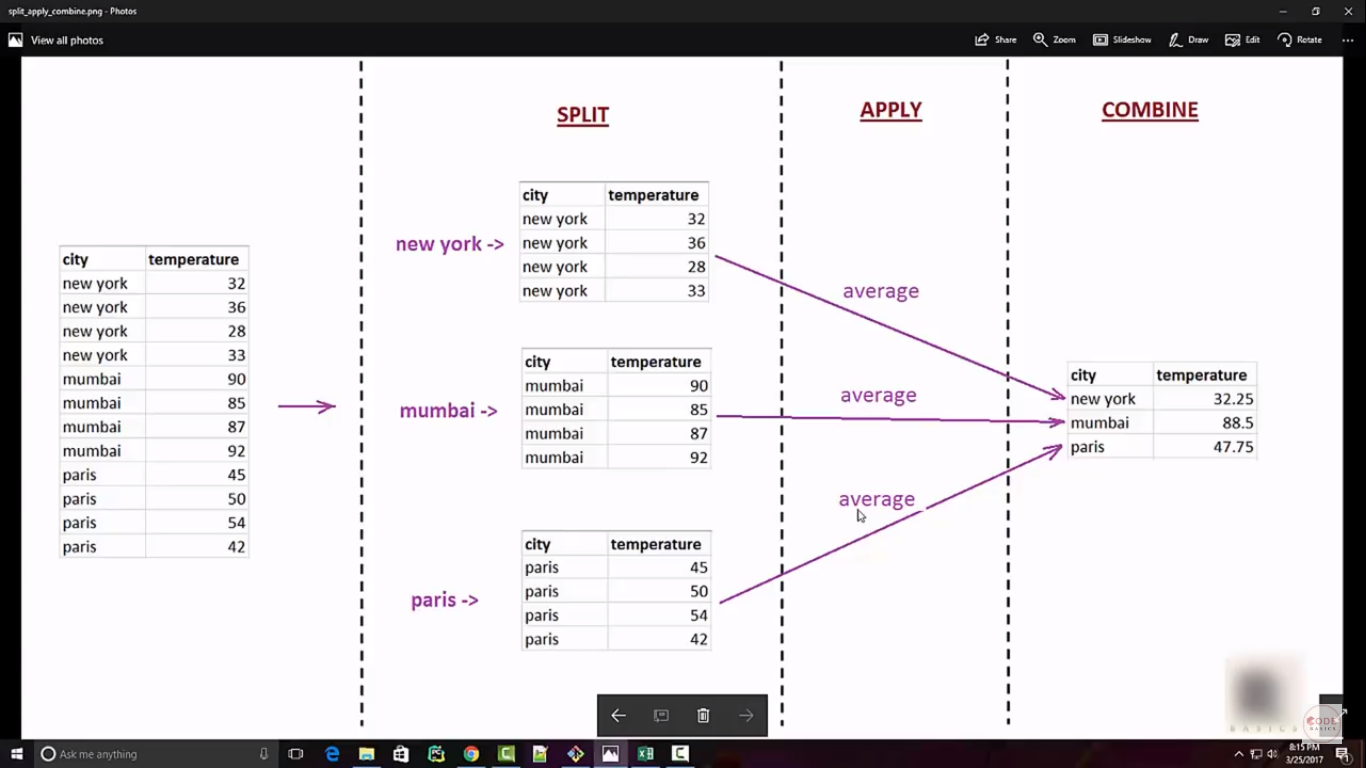

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

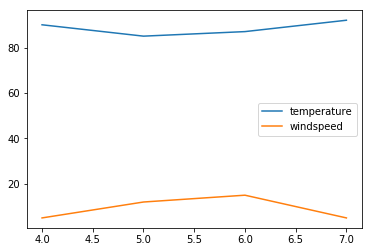

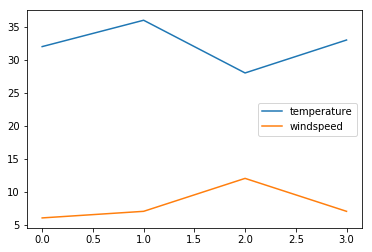

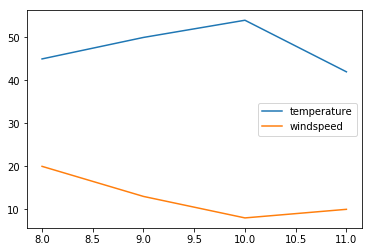

In [27]:
%matplotlib inline
group_df.plot()

In [30]:
#Concatenate the data frames- by default it will concatenate by row level
import pandas as pd
india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})

df = pd.concat([india_weather, us_weather], ignore_index=True)
df = pd.concat([india_weather, us_weather], keys=["india", "us"])
df

In [ ]:
temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2]) # index beacuse it will concatenate accordingly.
temperature_df

windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])
windspeed_df

df = pd.concat([temperature_df,windspeed_df],axis=1) # By default axis is 0 so 0 means rows and 1 means column
df

In [32]:
################# Merge #####################  
import pandas as pd
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})

df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})

df3 = pd.merge(df1, df2, on="city") # It will union the data
df3

#If cities are quite diff and any value is diff in cities then we will use joining method by method how.
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})

df3 = pd.merge(df1, df2, on="city", how='inner')

df3=pd.merge(df1,df2,on="city",how="outer",indicator=True) # to show the joins
df3

df3= pd.merge(df1,df2,on="city",how="outer", suffixes=('_first','_second')) # When we have same column names
#then it will automatically append the _first and _second after names

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,38.0,NaN,left_only
4,san diego,NaN,71.0,right_only


In [ ]:
#Pivot function
df.pivot(index="date",columns="city") # index is rows and columns is city
#Pivot table allows to summarize and aggregate data inside dataframe
df.pivot_table(index="city",columns="dates", aggfunc="sum")# it will give average accoring to city. by default it is mean in agg.

df.pivot_table(index=pd.Grouper(freq='M',key='date'),columns='city')


In [34]:
 #Reshape or melt function
df1=pd.melt(df,id_vars=["day"],var_name="city",value_name="temperature")
df1

In [38]:
df_stacked=df.stack(level=0)
df_stacked.unstack()

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


In [41]:
#Cross table or contengency table and it is used in frequency distribution
pd.crosstab(df.city,df.temperature, margins=True) #Margin will give total
pd.crosstab(df.city,df.temperature,normalize='index')

temperature,14,21,30,32,35,45
city,,,,,,
banglore,0.0,0.0,1.0,0.0,0.0,0.0
chicago,1.0,0.0,0.0,0.0,0.0,0.0
delhi,0.0,0.0,0.0,0.0,0.0,1.0
mumbai,0.0,0.0,0.0,1.0,0.0,0.0
new york,0.0,1.0,0.0,0.0,0.0,0.0
orlando,0.0,0.0,0.0,0.0,1.0,0.0


# Series and dataframe - Series is one dimentional array and dataframe is two dimentional data structure. 
#Both can store any datatype but in series we can change the values but not change the size. dataframe can change both the value and size.
#Dataframe is row column data structure. Two series will make one dataframe. Dataframe can make from series, list,dic,tuple etc. Series is smilar to python list.


items = [['Phone', 2000], ['TV', 1500], ['Radio', 800]]
df=pd.DataFrame(items,columns=['items','price'],dtype=float)
df.head()
df.describe

#DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The loc method is used for indexing by name, while iloc() is used for indexing by number.

#new way to read multiple excel files.
with pd.ExcelFile('worker.xlsx') as x:
    s1=pd.read_excel(x,'sheet1')
    s2=pd.read_excel(x,'sheet2')
    
print('sheet1:',s1)
print('sheet2:',s2)

# Split function trick

str1="Rimanshu Mangal"

First_Name,Second_name =str1.split(" ")

# Merging the dataframe
pd.merge(df1,df2,on='subject_id', how='inner', sort=False)

#Concatenate the dataframe means we add the one dataset to another.
pd.concat(df1,df2)

#.merge() can only use columns (plus rows indices) and it is semantically suitable for database-style operations. .concat() can be used with either axis, using only indices

#merge() is used to combine two (or more) dataframes on the basis of values of common columns (indices can also be used, use left_index=True and/or right_index=True), and concat() is used to append one (or more) dataframes one below the other (or sideways, depending on whether the axis option is set to 0 or 1).

#join() is used to merge 2 dataframes on the basis of the index; instead of using merge() with the option left_index=True we can use join().

#pd.concat takes an Iterable as its argument. Hence, it cannot take DataFrames directly as its argument. Also Dimensions of the DataFrame should match along axis while concatenating.

#pd.merge can take DataFrames as its argument, and is used to combine two DataFrames with same columns or index, which can't be done with pd.concat since it will show the repeated column in the DataFrame.

#pd.concat has inner default and outer joins only, while pd.DataFrame.merge() has left, right, outer, inner default joins.

#With pd.concat by default you are able to stack rows of multiple dataframes (axis=0) and when you set the axis=1 then you mimic the pd.DataFrame.merge() function.

#These are the main differences between df.join() and df.merge():

# Join will work on index while merge is not.

#lookup on right table: df1.join(df2) always joins via the index of df2, but df1.merge(df2) can join to one or more columns of df2 (default) or to the index of df2 (with right_index=True).
#lookup on left table: by default, df1.join(df2) uses the index of df1 and df1.merge(df2) uses column(s) of df1. That can be overridden by specifying df1.join(df2, on=key_or_keys) or df1.merge(df2, left_index=True).
#left vs inner join: df1.join(df2) does a left join by default (keeps all rows of df1), but df.merge does an inner join by default (returns only matching rows of df1 and df2).

# Join uses merge internally with indexing.

#Grouping the datasets alongwith any column.

df.groupby(by=grouping_columns)[columns_to_show].function()

raw = {  
    'Name': ['John', 'John', 'Grace', 'Grace', 'Benjamin', 'Benjamin', 'Benjamin',
        'Benjamin', 'John', 'Alex', 'Alex', 'Alex'],
    'Position': [2, 1, 1, 4, 2, 4, 3, 1, 3, 2, 4, 3],
    'Year': [2009, 2010, 2009, 2010, 2010, 2010, 2011, 2012, 2011, 2013, 2013, 2012],
    'Marks':[408, 398, 422, 376, 401, 380, 396, 388, 356, 402, 368, 378]
}
df=pd.DataFrame(raw)
group= df.groupby('year')
print(group.get_group(2010))

columns_to_show = ['Total day minutes', 'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, 
                                            np.max])


############# Cross tab #############

#Suppose we want to see how the observations in our sample are distributed in the context of two variables - Churn and International plan. To do so, we can build a contingency table using the crosstab method

pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True) - #normaize for %

pd.crosstab(df['Churn'], df['International plan'], margins=True) - #margin to show total also.

######### Map and apply function ###########

# The apply method can also be used to apply a function to each row. To do this, specify axis=1. Lambda functions are very convenient in such scenarios. 

# The map method can be used to replace values in a column by passing a dictionary of the form {old_value: new_value} as its argument:
